## Loading Libraries

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #vizualization
import matplotlib.pyplot as plt #vizualization
from matplotlib import cm

import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle

# Data Loading
from sklearn.datasets import load_iris

In [44]:
data = load_iris()

In [45]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [46]:
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [47]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Exploratory analysis

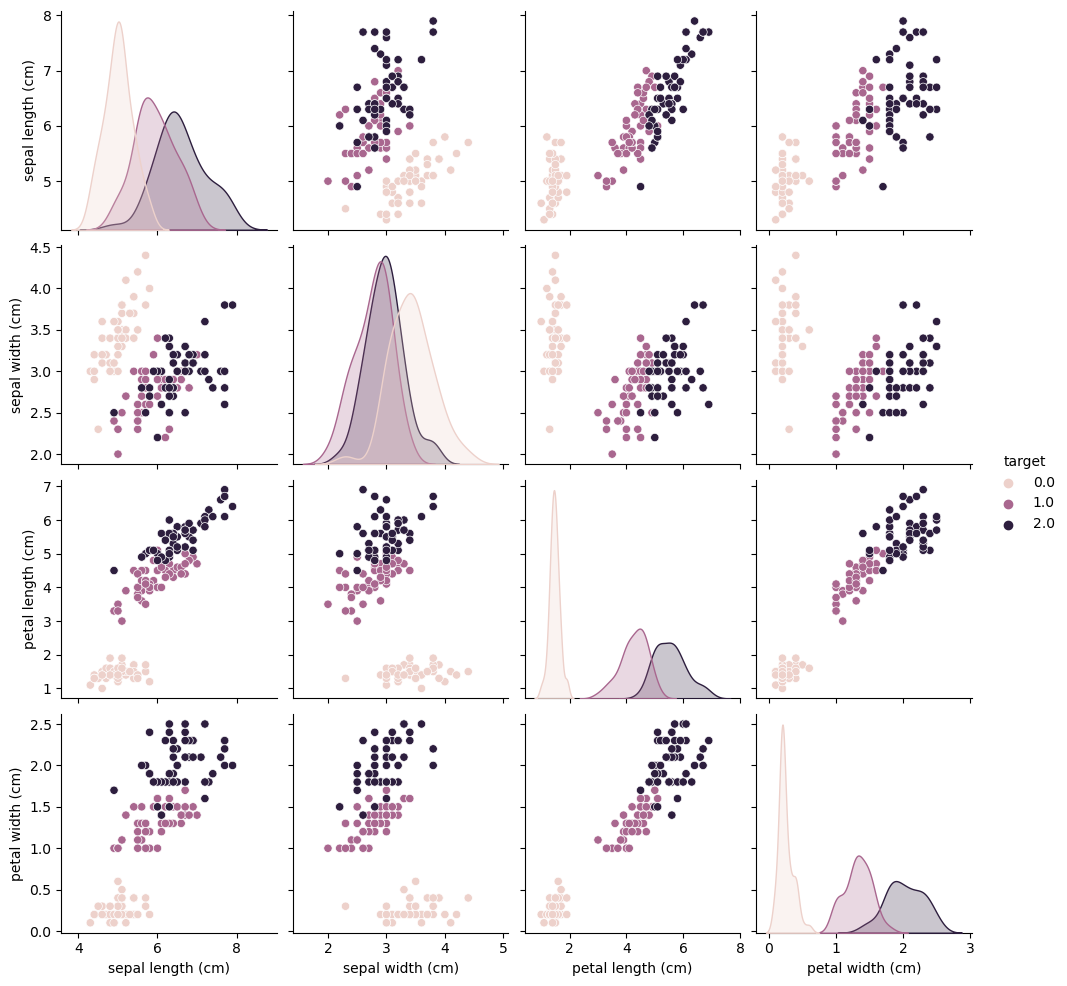

In [48]:
sns.pairplot(data=data[data.columns[0:6]], hue='target')
plt.show()

## Heatmap

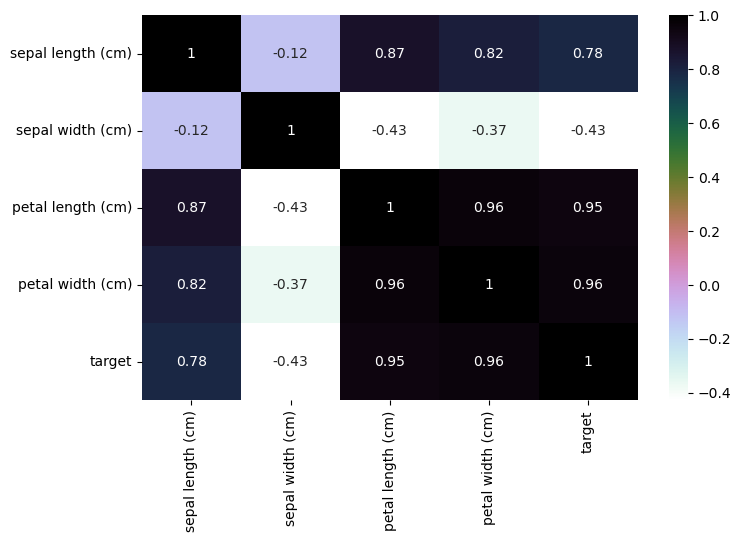

In [49]:
plt.figure(figsize=(8,5)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

#### From the plot, we can say that the Petal Width and Length are highly correlated

In [50]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#### Now, lets shuffle the data

In [51]:
data = shuffle(data)

In [52]:
X=data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
target=data[['target']]
y_true=target.copy()

In [53]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
26,5.0,3.4,1.6,0.4
109,7.2,3.6,6.1,2.5
55,5.7,2.8,4.5,1.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
96,5.7,2.9,4.2,1.3
32,5.2,4.1,1.5,0.1
6,4.6,3.4,1.4,0.3
84,5.4,3.0,4.5,1.5


In [54]:
target

,target
126,2.0
26,0.0
109,2.0
55,1.0
27,0.0
...,...
96,1.0
32,0.0
6,0.0
84,1.0


### Train the model

In [55]:
X = StandardScaler().fit_transform(X)
target = LabelBinarizer().fit_transform(target)

In [56]:
target

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1,

#### Dividing the Data into train and test

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 101)

#### Model

In [58]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
4/4 [==============================] - 9s 528ms/step - loss: 1.0328 - accuracy: 0.4167 - val_loss: 0.9948 - val_accuracy: 0.4333
Epoch 2/120
4/4 [==============================] - 0s 105ms/step - loss: 1.0147 - accuracy: 0.4167 - val_loss: 0.9767 - val_accuracy: 0.4333
Epoch 3/120
4/4 [==============================] - 0s 92ms/step - loss: 1.0000 - accuracy: 0.4250 - val_loss: 0.9596 - val_accuracy: 0.4333
Epoch 4/120
4/4 [==============================] - 0s 90ms/step - loss: 0.9851 - accuracy: 0.4250 - val_loss: 0.9433 - val_accuracy: 0.4333
Epoch 5/120
4/4 [==============================] - 0s 88ms/step - loss: 0.9703 - accuracy: 0.4250 - val_loss: 0.9275 - val_accuracy: 0.4333
Epoch 6/120
4/4 [==============================] - 0s 90ms/step - loss: 0.9566 - accuracy: 0.4500 - val_loss: 0.9109 - val_accuracy: 0.4667
Epoch 7/120
4/4 [==============================] - 0s 92ms/step - loss: 0.9405 - accuracy: 0.4750 - val_loss: 0.8933 - val_accuracy: 0.5000
Epoch 8/120
4/4 [=

4/4 [==============================] - 0s 82ms/step - loss: 0.1611 - accuracy: 0.9583 - val_loss: 0.1670 - val_accuracy: 0.9667
Epoch 60/120
4/4 [==============================] - 0s 109ms/step - loss: 0.1528 - accuracy: 0.9667 - val_loss: 0.1615 - val_accuracy: 0.9667
Epoch 61/120
4/4 [==============================] - 0s 122ms/step - loss: 0.1468 - accuracy: 0.9667 - val_loss: 0.1570 - val_accuracy: 0.9667
Epoch 62/120
4/4 [==============================] - 0s 105ms/step - loss: 0.1403 - accuracy: 0.9667 - val_loss: 0.1528 - val_accuracy: 0.9667
Epoch 63/120
4/4 [==============================] - 0s 104ms/step - loss: 0.1367 - accuracy: 0.9667 - val_loss: 0.1501 - val_accuracy: 0.9667
Epoch 64/120
4/4 [==============================] - 0s 101ms/step - loss: 0.1292 - accuracy: 0.9667 - val_loss: 0.1456 - val_accuracy: 0.9667
Epoch 65/120
4/4 [==============================] - 0s 83ms/step - loss: 0.1244 - accuracy: 0.9750 - val_loss: 0.1431 - val_accuracy: 0.9667
Epoch 66/120
4/4 [===

Epoch 117/120
4/4 [==============================] - 0s 89ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.1541 - val_accuracy: 0.9667
Epoch 118/120
4/4 [==============================] - 0s 88ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9667
Epoch 119/120
4/4 [==============================] - 0s 87ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.1565 - val_accuracy: 0.9667
Epoch 120/120
4/4 [==============================] - 0s 84ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9667


#### Predicting Targets for test data from the model trained on train data

In [61]:
#y_pred=model.predict_classes(x_test)
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 1s 997ms/step


#### Model Preformance 

In [62]:
y_test

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [63]:
y_test=np.argmax(y_test, axis=1)

In [64]:
y_test

array([2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 2, 0, 1, 1, 0, 1, 2], dtype=int64)

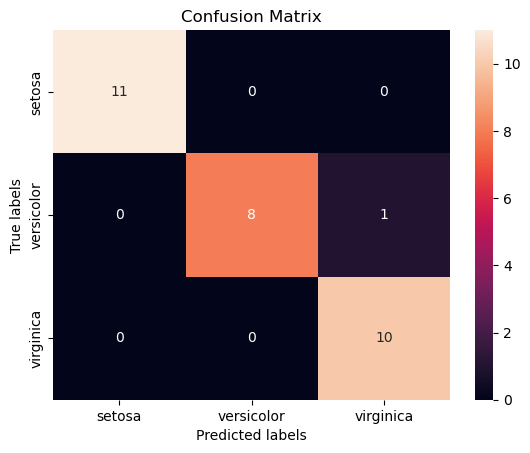

In [66]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.tolist(), classes_x.tolist())

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

In [67]:
from sklearn.metrics import precision_recall_fscore_support

In [69]:
precision_recall_fscore_support(y_test.tolist(), classes_x.tolist(), average='macro')

(0.9696969696969697, 0.9629629629629629, 0.9645191409897292, None)

### Plotting Accuracy and Loss

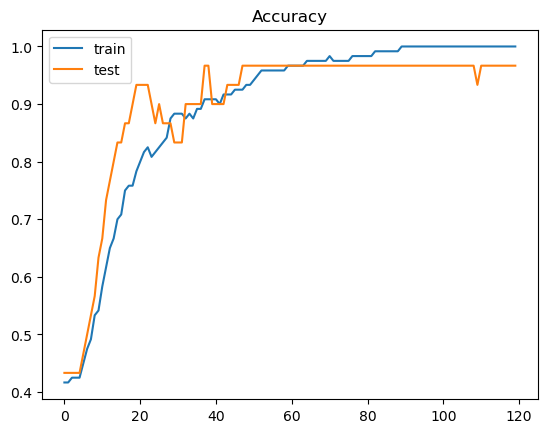

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

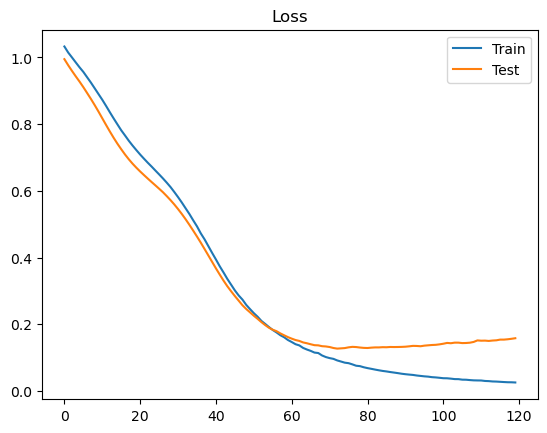

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()